# Customer Analysis for Retail Case Study

In [96]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as  plt  
import seaborn as sns
import datetime as dt
import warnings
warnings.filterwarnings('ignore')

### Importing Datasets

In [44]:
Customers =pd.read_csv("Customer.csv")
Product_Hierarchy = pd.read_csv("prod_cat_info.csv")
Product_Hierarchy.rename(columns={'prod_sub_cat_code': 'prod_subcat_code'}, inplace=True)
Transactions = pd.read_csv("Transactions.csv")

## Create a report and display the below calculated metrics, reports and inferences.
### 1. Merge the datasets Customers, Product Hierarchy and Transactions as Customer_Final. Ensure to keep all customers who have done transactions with us and select the join type accordingly.


In [45]:
Customer_Final = Transactions.merge(Customers,how='inner',left_on='cust_id',right_on='customer_Id').merge(Product_Hierarchy,how='inner',on=['prod_subcat_code','prod_cat_code'])
Customer_Final

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,customer_Id,DOB,Gender,city_code,prod_cat,prod_subcat
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop,270351,26-09-1981,M,5.0,Clothing,Women
1,80712190438,270351,20-02-2014,1,1,5,772,405.300,4265.300,e-Shop,270351,26-09-1981,M,5.0,Clothing,Women
2,18505840838,271509,16-12-2013,1,1,3,1229,387.135,4074.135,Flagship store,271509,08-06-1981,M,3.0,Clothing,Women
3,92814475704,267750,16-08-2013,1,1,-4,-284,119.280,-1255.280,Flagship store,267750,13-10-1986,M,1.0,Clothing,Women
4,92814475704,267750,7/8/2013,1,1,4,284,119.280,1255.280,Flagship store,267750,13-10-1986,M,1.0,Clothing,Women
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23048,7173864364,271157,9/4/2011,4,4,5,788,413.700,4353.700,Flagship store,271157,15-10-1973,F,6.0,Bags,Women
23049,5618131425,272010,3/3/2011,4,4,2,1150,241.500,2541.500,MBR,272010,22-12-1972,F,5.0,Bags,Women
23050,18727956164,267161,23-02-2011,4,4,5,668,350.700,3690.700,e-Shop,267161,08-05-1981,M,9.0,Bags,Women
23051,60416814232,273281,18-02-2011,4,4,4,202,84.840,892.840,Flagship store,273281,14-12-1988,F,9.0,Bags,Women


### 2. Prepare a summary report for the merged data set.
### a. Get the column names and their corresponding data types

In [46]:
# Column names in Customer Final
Customer_Final.columns

Index(['transaction_id', 'cust_id', 'tran_date', 'prod_subcat_code',
       'prod_cat_code', 'Qty', 'Rate', 'Tax', 'total_amt', 'Store_type',
       'customer_Id', 'DOB', 'Gender', 'city_code', 'prod_cat', 'prod_subcat'],
      dtype='object')

In [47]:
# Data types of columns in Customer Final
Customer_Final.dtypes

transaction_id        int64
cust_id               int64
tran_date            object
prod_subcat_code      int64
prod_cat_code         int64
Qty                   int64
Rate                  int64
Tax                 float64
total_amt           float64
Store_type           object
customer_Id           int64
DOB                  object
Gender               object
city_code           float64
prod_cat             object
prod_subcat          object
dtype: object

### b. Top/Bottom 10 observations

In [48]:
# Top 10 observations
Customer_Final.head(10)

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,customer_Id,DOB,Gender,city_code,prod_cat,prod_subcat
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop,270351,26-09-1981,M,5.0,Clothing,Women
1,80712190438,270351,20-02-2014,1,1,5,772,405.300,4265.300,e-Shop,270351,26-09-1981,M,5.0,Clothing,Women
2,18505840838,271509,16-12-2013,1,1,3,1229,387.135,4074.135,Flagship store,271509,08-06-1981,M,3.0,Clothing,Women
3,92814475704,267750,16-08-2013,1,1,-4,-284,119.280,-1255.280,Flagship store,267750,13-10-1986,M,1.0,Clothing,Women
4,92814475704,267750,7/8/2013,1,1,4,284,119.280,1255.280,Flagship store,267750,13-10-1986,M,1.0,Clothing,Women
5,4737317330,269345,29-07-2011,1,1,5,1141,599.025,6304.025,MBR,269345,26-06-1970,F,10.0,Clothing,Women
6,44425889101,274987,18-03-2012,1,1,4,897,376.740,3964.740,Flagship store,274987,08-10-1983,M,2.0,Clothing,Women
7,90501340928,271817,19-02-2012,1,1,1,1122,117.810,1239.810,TeleShop,271817,24-12-1989,M,8.0,Clothing,Women
8,99335419136,268755,13-12-2012,1,1,3,1181,372.015,3915.015,e-Shop,268755,15-07-1984,F,8.0,Clothing,Women
9,35030444164,268129,18-11-2011,1,1,5,1047,549.675,5784.675,MBR,268129,07-08-1982,F,9.0,Clothing,Women


In [49]:
# Bottom 10 observations
Customer_Final.tail(10)

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,customer_Id,DOB,Gender,city_code,prod_cat,prod_subcat
23043,3387244829,269114,15-07-2011,4,4,1,388,40.740,428.740,e-Shop,269114,22-01-1989,F,5.0,Bags,Women
23044,76906459516,267940,15-06-2011,4,4,2,1263,265.230,2791.230,Flagship store,267940,09-06-1979,M,9.0,Bags,Women
23045,73549617163,271334,5/7/2011,4,4,5,263,138.075,1453.075,e-Shop,271334,08-12-1983,F,10.0,Bags,Women
23046,75339646315,274827,2/5/2011,4,4,4,1381,580.020,6104.020,e-Shop,274827,27-12-1988,F,8.0,Bags,Women
23047,6650926717,268110,5/4/2011,4,4,4,1036,435.120,4579.120,MBR,268110,06-03-1976,M,2.0,Bags,Women
23048,7173864364,271157,9/4/2011,4,4,5,788,413.700,4353.700,Flagship store,271157,15-10-1973,F,6.0,Bags,Women
23049,5618131425,272010,3/3/2011,4,4,2,1150,241.500,2541.500,MBR,272010,22-12-1972,F,5.0,Bags,Women
23050,18727956164,267161,23-02-2011,4,4,5,668,350.700,3690.700,e-Shop,267161,08-05-1981,M,9.0,Bags,Women
23051,60416814232,273281,18-02-2011,4,4,4,202,84.840,892.840,Flagship store,273281,14-12-1988,F,9.0,Bags,Women
23052,83245680995,273723,26-01-2011,4,4,4,1477,620.340,6528.340,e-Shop,273723,21-01-1984,F,4.0,Bags,Women


### c. “Five-number summary” for continuous variables (min, Q1, median, Q3 and max)

In [50]:
# Here '25%','50%', '75%' means Q1 ,median, Q3 respectively 
y =Customer_Final.loc[:,'Qty':'total_amt'].describe().loc[['min','25%','50%','75%','max']]
y.rename(index={'25%': 'Q1','50%':'median','75%':'Q3'},inplace=True)
y

,Qty,Rate,Tax,total_amt
min,-5.0,-1499.0,7.350,-8270.925
Q1,1.0,312.0,98.280,762.450
median,3.0,710.0,199.080,1754.740
Q3,4.0,1109.0,365.715,3569.150
max,5.0,1500.0,787.500,8287.500


### d. Frequency tables for all the categorical variables

In [51]:
# Frequency of different Genders
Customer_Final.value_counts('Gender')

Gender
M    11811
F    11233
Name: count, dtype: int64

In [52]:
# Frequency of different Store Types
Customer_Final.value_counts('Store_type')

Store_type
e-Shop            9311
MBR               4661
Flagship store    4577
TeleShop          4504
Name: count, dtype: int64

In [53]:
# Frequency of different City Codes
Customer_Final.value_counts('city_code')

city_code
4.0     2422
3.0     2411
5.0     2360
7.0     2356
10.0    2333
8.0     2330
2.0     2270
1.0     2258
9.0     2178
6.0     2127
Name: count, dtype: int64

In [54]:
# Frequency of different prod_subcat in each of the prod_cat
Customer_Final.groupby(['prod_cat','prod_subcat'])[['prod_subcat']].count()

prod_subcat
prod_cat         prod_subcat                     
Bags             Mens                        1003
                 Women                        995
Books            Academic                     967
                 Children                    1035
                 Comics                      1031
                 DIY                          989
                 Fiction                     1043
                 Non-Fiction                 1004
Clothing         Kids                         988
                 Mens                         967
                 Women                       1005
Electronics      Audio and video              952
                 Cameras                      985
                 Computers                    958
                 Mobiles                     1031
                 Personal Appliances          972
Footwear         Kids                        1009
                 Mens                         942
                 Women                       1048
Home and kitchen Bath                        1023
                 Furnishing                  1007
                 Kitchen                     1037
                 Tools                       1062

### 3. Generate histograms for all continuous variables and frequency bars for categorical variables.

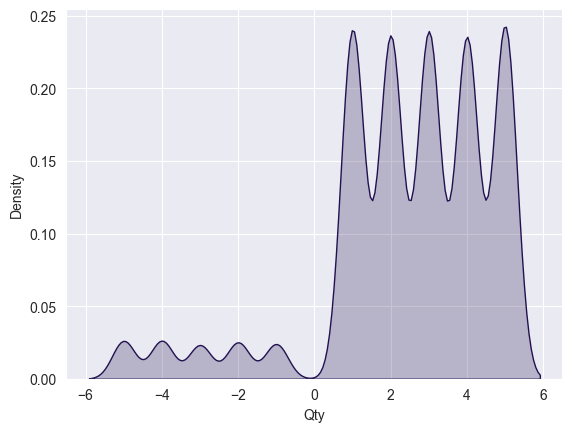

In [55]:

sns.set_palette("magma")

# Set the grid style
sns.set_style("darkgrid")

# Plot the kernel density estimation
sns.kdeplot(data=Customer_Final, x='Qty', fill=True)

# Display the plot
plt.show()


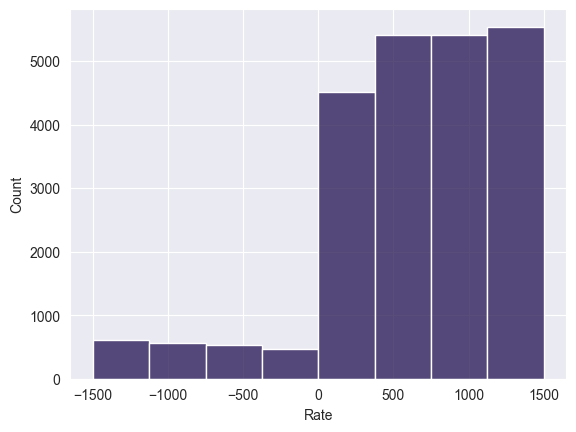

In [56]:

# Set the color palette to "Set2"
sns.set_palette("magma")

# Plot the histogram
sns.histplot(data=Customer_Final, x='Rate', bins=8)

# Display the plot
plt.show()


<AxesSubplot: xlabel='Tax', ylabel='Count'>

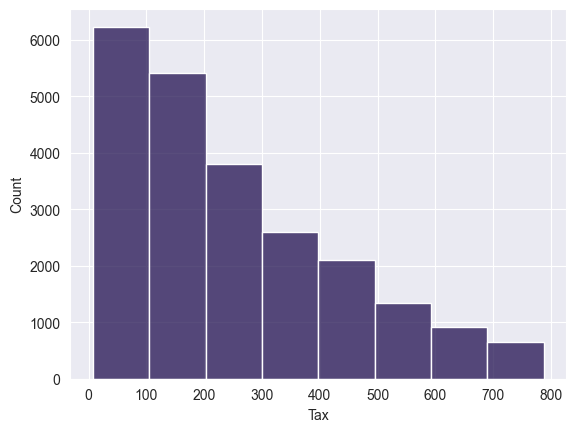

In [57]:

import seaborn as sns

sns.set_palette("magma")
sns.histplot(data=Customer_Final, x='Tax', bins=8)


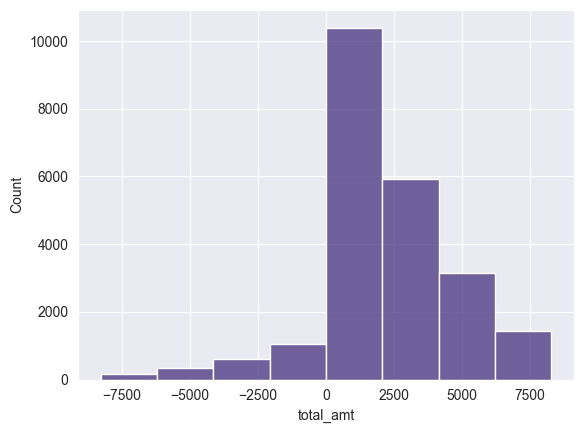

In [58]:
# Histogram for total amount
sns.set_palette("viridis")
sns.histplot(data = Customer_Final,x='total_amt',bins=8);

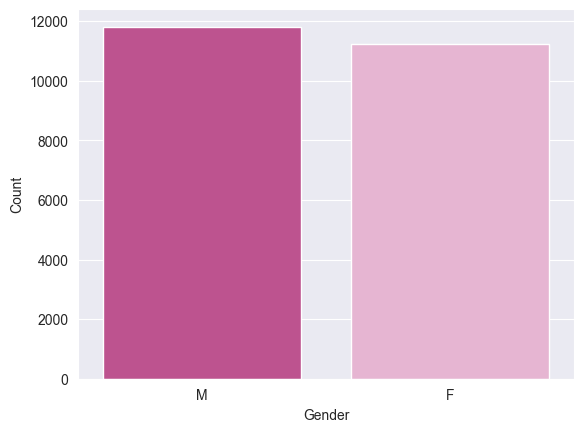

In [59]:
# Bar chart of Gender
sns.set_palette("PiYG")
sns.barplot(x=Customer_Final.value_counts('Gender').index,y=Customer_Final.value_counts('Gender').values)
plt.ylabel('Count');

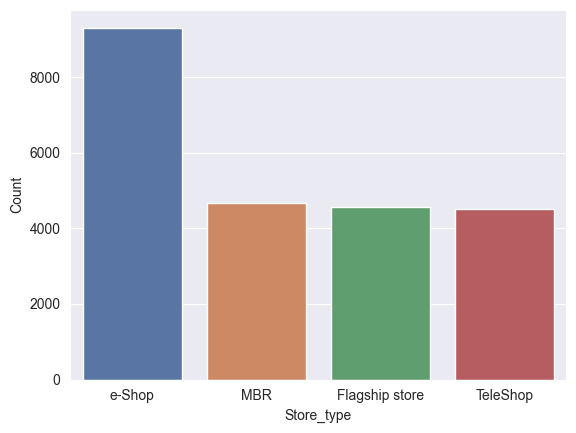

In [60]:
# Bar chart for Store Type
sns.set_palette("deep")
sns.barplot(x=Customer_Final.value_counts('Store_type').index,y=Customer_Final.value_counts('Store_type').values)
plt.ylabel('Count');

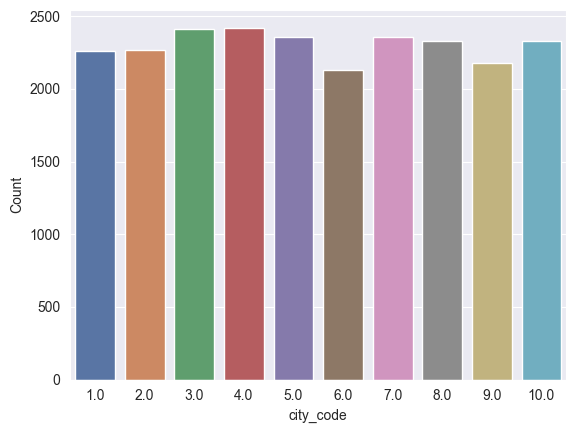

In [61]:
# Bar chart for City code
sns.set_palette('deep')
sns.barplot(x=Customer_Final.value_counts('city_code').index,y=Customer_Final.value_counts('city_code').values)
plt.ylabel('Count');

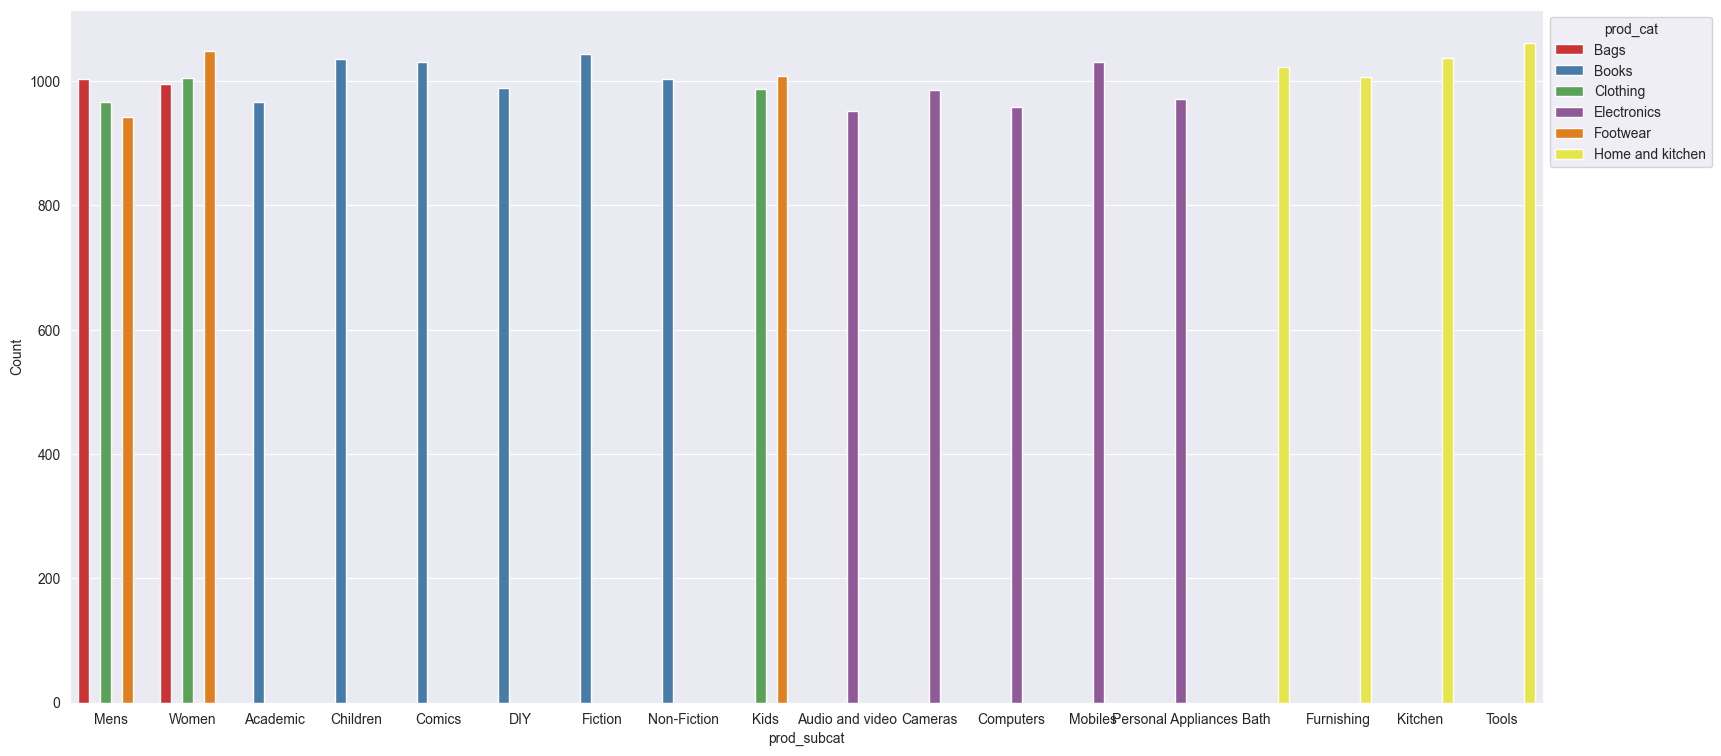

In [63]:
# Using pivot table and seaborn
x=Customer_Final.pivot_table(index=['prod_cat','prod_subcat'],values='cust_id',aggfunc='count')
x=x.reset_index(level ='prod_subcat')
sns.set_palette("Set1")
plt.figure(figsize=(19,9))
plt.xticks(np.arange(0, 1200, step=100))
m =sns.barplot(data=x,hue=x.index,x=x.prod_subcat,y=x.cust_id)
sns.move_legend( m,"upper left", bbox_to_anchor=(1, 1))
plt.ylabel('Count');

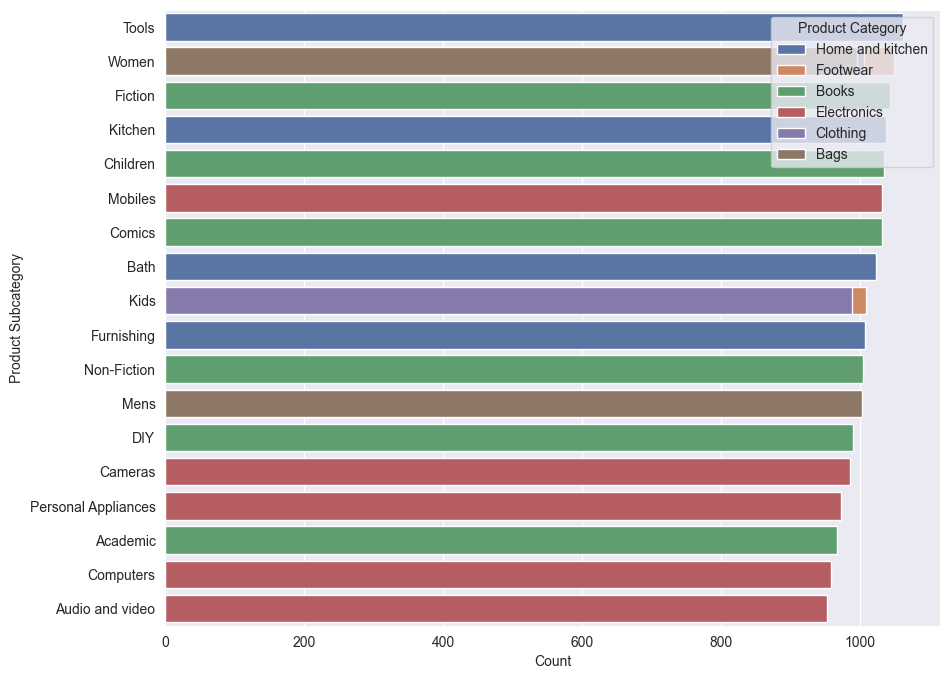

In [64]:


sns.set_palette("deep")
plt.figure(figsize=(10, 8))
x = Customer_Final.groupby(['prod_cat', 'prod_subcat']).size().reset_index(name='count')
x = x.sort_values('count', ascending=False)
sns.barplot(data=x, y='prod_subcat', x='count', hue='prod_cat', dodge=False)
plt.xlabel('Count')
plt.ylabel('Product Subcategory')
plt.legend(title='Product Category')
plt.show()


### 4. Calculate the following information using the merged dataset :
### a. Time period of the available transaction data

In [65]:
Transactions['tran_date'] = pd.to_datetime(Transactions['tran_date'], format='mixed', dayfirst=True)
Transactions['tran_date']

0       2014-02-28
1       2014-02-27
2       2014-02-24
3       2014-02-24
4       2014-02-23
           ...    
23048   2011-01-25
23049   2011-01-25
23050   2011-01-25
23051   2011-01-25
23052   2011-01-25
Name: tran_date, Length: 23053, dtype: datetime64[ns]

In [66]:
Customer_Final['tran_date'] = pd.to_datetime(Customer_Final['tran_date'], format='mixed', dayfirst=True)


In [67]:
# Time period in Days
(Customer_Final.tran_date.max()-Customer_Final.tran_date.min()).days

1130

In [128]:
# Time period in Months approximately
(Customer_Final.tran_date.max().to_period('m') - Customer_Final.tran_date.min().to_period('m')).n

37

In [68]:
# Time period in Years approximately
(Customer_Final.tran_date.max().to_period('y') - Customer_Final.tran_date.min().to_period('y')).n

3

### b. Count of transactions where the total amount of transaction was negative

In [69]:
len(Customer_Final.loc[Customer_Final.total_amt<0])

2177

### 5. Analyze which product categories are more popular among females vs male customers.

In [70]:
# Using pivot table
Customer_Final.pivot_table(index='Gender',columns='prod_cat',values='cust_id',aggfunc='count')

prod_cat,Bags,Books,Clothing,Electronics,Footwear,Home and kitchen
Gender,,,,,,
F,994,2949,1439,2328,1529,1994
M,1004,3116,1518,2570,1469,2134


##### All the product categories are popular among Males other than Footwear

### 6. Which City code has the maximum customers and what was the percentage of customers from that city?


In [71]:
# Grouping number of customers to each city code
city_customer=Customers.groupby('city_code')[['customer_Id']].count().rename(columns={'customer_Id':'Number of Customers'})

In [72]:
# Sorting Number of Customers from highest to lowest
city_customer = city_customer.sort_values(by=['Number of Customers'],ascending=False)

In [73]:
# Assigning a new column for percentage of customers
city_customer['Percentage of total Customers'] = round((city_customer['Number of Customers'] * 100/(city_customer['Number of Customers'].sum())),2)

In [74]:
city_customer.head(1)

,Number of Customers,Percentage of total Customers
city_code,,
3.0,595,10.54


##### City code 3 has maximum customers and has 10.54 percentage of total customers

### 7. Which store type sells the maximum products by value and by quantity?

In [75]:
# Grouping sum of total amount and sum of quantity to each Store typthen sorting from highest to lowest
Customer_Final.loc[Customer_Final.total_amt>0].groupby('Store_type')[['total_amt','Qty']].sum().sort_values(by=['total_amt','Qty'],ascending=False)

,total_amt,Qty
Store_type,,
e-Shop,2.218561e+07,25435
MBR,1.090854e+07,12581
Flagship store,1.090662e+07,12460
TeleShop,1.045312e+07,12225


##### Store type e-Shop sells the maximum products by value and by quantity

### 8. What was the total amount earned from the "Electronics" and "Clothing" categories from Flagship Stores?


In [76]:
# Assigning sales and returns separately to two dataframes
sales = Customer_Final.loc[Customer_Final.total_amt>0]
returns = Customer_Final.loc[Customer_Final.total_amt<0]

In [77]:
# Dropping tran date in Returns help to remove duplicates later
returns =returns.drop(columns='tran_date')

In [78]:
# Merging Sales with Return using left join
final =sales.merge(returns,on='transaction_id',how='left')

In [79]:
# Dropping duplicates helps to remove the duplicates of different returns of the same transaction id
final=final.drop_duplicates()
final

,transaction_id,cust_id_x,tran_date,prod_subcat_code_x,prod_cat_code_x,Qty_x,Rate_x,Tax_x,total_amt_x,Store_type_x,...,Rate_y,Tax_y,total_amt_y,Store_type_y,customer_Id_y,DOB_y,Gender_y,city_code_y,prod_cat_y,prod_subcat_y
0,80712190438,270351,2014-02-20,1,1,5,772,405.300,4265.300,e-Shop,...,-772.0,405.30,-4265.30,e-Shop,270351.0,26-09-1981,M,5.0,Clothing,Women
1,18505840838,271509,2013-12-16,1,1,3,1229,387.135,4074.135,Flagship store,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,92814475704,267750,2013-08-07,1,1,4,284,119.280,1255.280,Flagship store,...,-284.0,119.28,-1255.28,Flagship store,267750.0,13-10-1986,M,1.0,Clothing,Women
3,4737317330,269345,2011-07-29,1,1,5,1141,599.025,6304.025,MBR,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,44425889101,274987,2012-03-18,1,1,4,897,376.740,3964.740,Flagship store,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20989,7173864364,271157,2011-04-09,4,4,5,788,413.700,4353.700,Flagship store,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20990,5618131425,272010,2011-03-03,4,4,2,1150,241.500,2541.500,MBR,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20991,18727956164,267161,2011-02-23,4,4,5,668,350.700,3690.700,e-Shop,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20992,60416814232,273281,2011-02-18,4,4,4,202,84.840,892.840,Flagship store,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [80]:
# Filtering Electronics and clothing in product category and Flagship store in store type
x = final.loc[(final.prod_cat_x.isin (['Electronics','Clothing'])) & (final.Store_type_x == 'Flagship store')]

In [81]:
# Total amount earned from the "Electronics" and "Clothing" categories from Flagship Stores
x.total_amt_x.sum() + x.total_amt_y.sum()

3428316.645

### 9. What was the total amount earned from "Male" customers under the "Electronics" category?

In [85]:
# Filtering Electronics in product category and Males in gender
temp =final.loc[(final.Gender_x == 'M') & (final.prod_cat_x == 'Electronics')]
# Total amount earned from "Male" customers under the "Electronics" category
temp.total_amt_x.sum() + temp.total_amt_y.sum()

5744917.1

### 10. How many customers have more than 10 unique transactions, after removing all transactions which have any negative amounts?


In [88]:
# Using sale df to avoid negative transactions and grouping cust id to get number of unique transactions
a= sales.groupby('cust_id')[['transaction_id']].count()

In [89]:
# Number of customers have more than 10 unique transactions after removing negative amounts
len(a.loc[a.transaction_id >10])

6

### 11. For all customers aged between 25 - 35, find out:
### a. What was the total amount spent for “Electronics” and “Books” product categories?

In [119]:
# Changing the data type of DOB to datetime
sales['DOB'] = pd.to_datetime(sales['DOB'], dayfirst=True)

# Locating rows of sales between 25 and 35 age group
temp1 = sales.loc[(dt.date.today().year - sales.DOB.dt.year).between(25,35)]
temp1 = temp1.loc[temp1.prod_cat.isin(['Electronics','Books'])]
# total amount spent for “Electronics” and “Books” product categories by all customers aged between 25 - 35
temp1.total_amt.sum()

5572389.03

# b. What was the total amount spent by these customers between 1st Jan, 2014 to 1st Mar, 2014?

In [121]:
sales.loc[sales.tran_date.between('2014-01-01','2014-03-01')].total_amt.sum()

2532216.895